In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Load and Explore the Data
# Load the dataset with the appropriate encoding
book_data = pd.read_csv("/content/book (1).csv", encoding='latin1')

In [3]:
# Display the first few rows of the dataset
print(book_data.head())



   Unnamed: 0  User.ID                                         Book.Title  \
0           1   276726                                Classical Mythology   
1           2   276729                                       Clara Callan   
2           3   276729                               Decision in Normandy   
3           4   276736  Flu: The Story of the Great Influenza Pandemic...   
4           5   276737                             The Mummies of Urumchi   

   Book.Rating  
0            5  
1            3  
2            6  
3            8  
4            6  


In [4]:


# Check the data types and missing values
print(book_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None


In [5]:
book_data['Book.ID'] = book_data['User.ID'].astype(str) + ' - ' + book_data['Book.Title']


In [6]:
# Step 3: Calculate Cosine Similarity
# Create a CountVectorizer to convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
book_matrix = vectorizer.fit_transform(book_data['Book.Title'])

In [7]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(book_matrix, book_matrix)

In [10]:
def recommend_books(book_title, cosine_sim=cosine_sim):
    # Get the index of the book title
    try:
        idx = book_data[book_data['Book.Title'] == book_title].index[0]
    except IndexError:
        print(f"Book '{book_title}' not found.")
        return []

    # Get the pairwise similarity scores
    similar_indices = list(enumerate(cosine_sim[idx]))

    # Sort the books by similarity score
    similar_indices = sorted(similar_indices, key=lambda x: x[1], reverse=True)

    # Extract the book titles
    similar_books = [book_data['Book.Title'].iloc[i[0]] for i in similar_indices]

    return similar_books

In [11]:
similar_books = recommend_books("Harry Potter and the Sorcerer's Stone")
print("Books similar to 'Harry Potter and the Sorcerer's Stone':")
for book in similar_books:
    print("-", book)

Book 'Harry Potter and the Sorcerer's Stone' not found.
Books similar to 'Harry Potter and the Sorcerer's Stone':


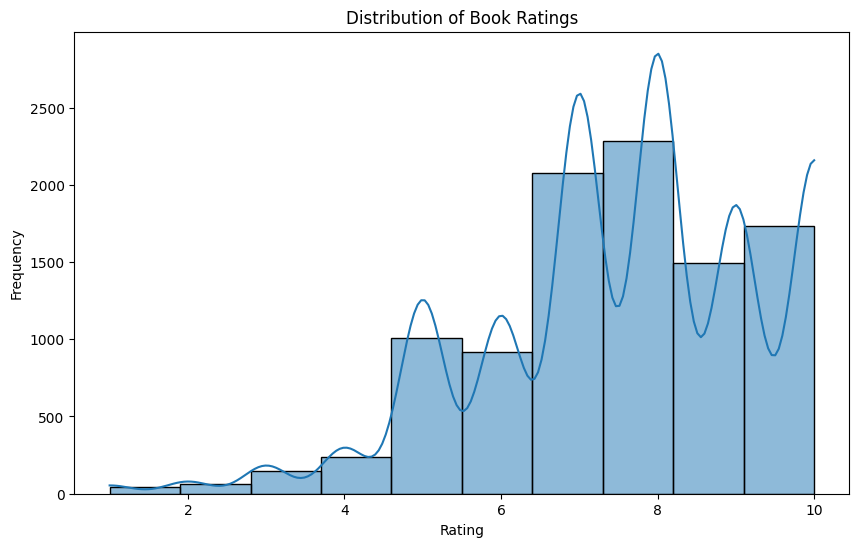

In [12]:
# Step 5: Visualizations
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=book_data, x='Book.Rating', bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Create a scatterplot with the following specifications:
# - Data source: book_data
# - X-axis: Book.Rating
# - Y-axis: User.ID
# - Color-coded by: Book.Title
# - Title: Book Rating vs User ID
# - X-axis label: Rating
# - Y-axis label: User ID
# - Legend location: upper left, with the bounding box anchored to the top-right corner of the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=book_data, x='Book.Rating', y='User.ID', hue='Book.Title')
plt.title('Book Rating vs User ID')
plt.xlabel('Rating')
plt.ylabel('User ID')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

ValueError: Image size of 2436x202681 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

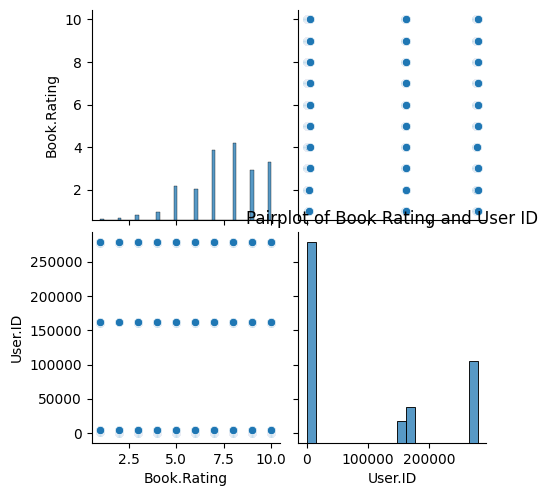

In [17]:
# Multivariate Analysis
sns.pairplot(book_data[['Book.Rating', 'User.ID']])
plt.title('Pairplot of Book Rating and User ID')
plt.show()